In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import ot
from lib import *

def plot_3d_point_cloud(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    r_values, x_values, y_values = points[:, 0], points[:, 1], points[:, 2]
    
    ax.scatter(x_values, y_values, r_values, c=r_values, cmap='viridis', s=50)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('r')
    ax.set_title('3D Interpolated Point Cloud')
    
    plt.show()

# Initialize lists to store audio data and sample rates
rir = np.zeros((2, 7, 6), dtype=object) # room impluse response
sr = np.zeros((2, 7, 6), dtype=object) # sample rate

for i in range(1, 3):  # speaker
    for j in range(-3, 4):  # position
        for k in range(1, 7):  # microphone
            file_path = f'./data/IRs_valerio/pos_{j}_speaker_{i}/ir_pos_{j}_speaker_{i}_mic{k}.wav'
            rir[i-1, j+3, k-1], sr[i-1, j+3, k-1] = librosa.load(file_path,sr=None)

print('all done!')

# Example usage
P = rir[0, 0, 0]
Q = rir[0, 1, 0]
kappa = 0.5  
T_bar = ot.dist(P, Q, metric='euclidean')

result = construct_interpolated_point_cloud(P, Q, kappa, T_bar)
print("Interpolated Point Cloud:")
print(result)

plot_3d_point_cloud(result)


C:\Users\yewentai\AppData\Local\Temp\ipykernel_4688\1269045705.py:30: UserWarning: PySoundFile failed. Trying audioread instead.
  rir[i-1, j+3, k-1], sr[i-1, j+3, k-1] = librosa.load(file_path,sr=None)
c:\ProgramData\Miniconda3\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: './data/IRs_valerio/pos_-3_speaker_1/ir_pos_-3_speaker_1_mic1.wav'

Interpolated Point Cloud:
[[0.0957168  4.         5.        ]
 [0.19792386 5.         6.        ]
 [0.26358603 6.         7.        ]
 [0.52954383 5.         6.        ]
 [0.70736156 6.         7.        ]
 [0.6623552  7.         8.        ]
 [0.38771096 6.         7.        ]
 [0.48982806 7.         8.        ]
 [0.37123784 8.         9.        ]]


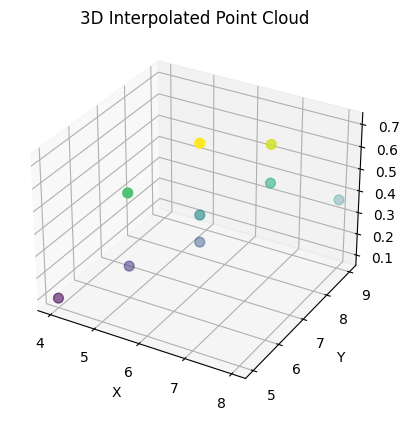

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_point_cloud(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    r_values, x_values, y_values = points[:, 0], points[:, 1], points[:, 2]
    
    ax.scatter(x_values, y_values, r_values, c=r_values, cmap='viridis', s=50)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('r')
    ax.set_title('3D Interpolated Point Cloud')
    
    plt.show()

# Example usage
P = np.array([[1, 2, 0.5], [3, 4, 0.7], [5, 6, 0.3]])  # Replace with your actual points
Q = np.array([[7, 8, 0.4], [9, 10, 0.6], [11, 12, 0.2]])  # Replace with your actual points
kappa = 0.5  # Replace with your actual kappa value
T_bar = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])  # Replace with your actual transport plan
ot.dist
ot.emd

result = construct_interpolated_point_cloud(P, Q, kappa, T_bar)
print("Interpolated Point Cloud:")
print(result)

plot_3d_point_cloud(result)
